In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv

# Collect and store time series

In [5]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv

CSV_URL = "https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt"
with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

list_station_integers = []
for elt in my_list:
    list_station_integers.append(elt[0][-5:])

locations = [elt for elt in list_station_integers if ' ' not in elt]
print(locations[:10])
print(len(locations),'stations found')

['41196', '41194', '41217', '41218', '40930', '40938', '40948', '40990', '60390', '60590']
8100 stations found


In [7]:
for year in range(2018,2020):
    dict_locations = {}
    summary = []
    bisex = not year%4
    for k,location_str in enumerate(locations[:10]):
        globaltemp = []
        if not k%100:
            print(k,end='|')
        location = location_str+'099999'
        CSV_URL = "https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/"+str(year)+"/"+location+".csv"
        with requests.Session() as s:
            download = s.get(CSV_URL)
            decoded_content = download.content.decode('utf-8')
            cr = csv.reader(decoded_content.splitlines(), delimiter=',')
        my_list = list(cr)
        #print(my_list)
        my_list_pd = pd.DataFrame(my_list[1:],columns = my_list[0])
        if len(my_list[1])<2:
            if not k%100:
                print('Year',year,'not available',end='|')
        else:
            lat = float(my_list_pd.iloc[0][2])
            long = float(my_list_pd.iloc[0][3])
            #print('latitude',lat,'longitude',long)
            if (40< lat < 60) and (-130 < long < -100):#lytton filter
                print('New obs found',my_list_pd.iloc[0][:6])
            else: 
                pass
            
'''
            for k,elt in enumerate(my_list):#loop over days of the year
                if k>0:
                    if (len(elt) == 28):
                        globaltemp.append((float(elt[6])-32)*5/9)
            if bisex:
                if len(globaltemp) == 366:  
                    if year not in dict_locations.keys():
                        dict_locations[year] = [location_str]
                    else:
                        dict_locations[year].append(location_str)
            else:
                if len(globaltemp) == 365:  
                    if year not in dict_locations.keys():
                        dict_locations[year] = [location_str]
                    else:
                        dict_locations[year].append(location_str)
        summary.append(globaltemp)
    if bisex:
        summary_ = [elt for elt in summary if len(elt)==366]
    else:
        summary_ = [elt for elt in summary if len(elt)==365]
    data = np.array(summary_)
    if  len(summary_)>0:
        n = data.shape[0]
        p = data.shape[1]
        np.savetxt("data/collect/"+str(year)+"_"+str(n)+"_"+str(p)+".csv",data)
        n_locations = len(dict_locations[year])
        with open("data/collect/"+str(year)+"_"+str(n_locations)+"_locations.json", 'w') as fp:
            json.dump(dict_locations, fp)
    else:
        print('No data from',year)
'''

0|0|

'\n            for k,elt in enumerate(my_list):#loop over days of the year\n                if k>0:\n                    if (len(elt) == 28):\n                        globaltemp.append((float(elt[6])-32)*5/9)\n            if bisex:\n                if len(globaltemp) == 366:  \n                    if year not in dict_locations.keys():\n                        dict_locations[year] = [location_str]\n                    else:\n                        dict_locations[year].append(location_str)\n            else:\n                if len(globaltemp) == 365:  \n                    if year not in dict_locations.keys():\n                        dict_locations[year] = [location_str]\n                    else:\n                        dict_locations[year].append(location_str)\n        summary.append(globaltemp)\n    if bisex:\n        summary_ = [elt for elt in summary if len(elt)==366]\n    else:\n        summary_ = [elt for elt in summary if len(elt)==365]\n    data = np.array(summary_)\n    if 

In [101]:
###SPECIAL STATION COLLECT
summary = []
location_str = str(71891099999)
for year in range(2021,2022):
    dict_locations = {}
    bisex = not year%4
    globaltemp = []
    location = location_str
    CSV_URL = "https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/"+str(year)+"/"+location+".csv"
    with requests.Session() as s:
        download = s.get(CSV_URL)
        decoded_content = download.content.decode('utf-8')
        cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    #print(my_list)
    if len(my_list[1])<2:
        print('Year',year,'not available',end='|')
    else:
        for k,elt in enumerate(my_list):#loop over days of the year
            if k>0:
                if (len(elt) == 28):
                    #elt[6] gives the attribute TEMP
                    #elt[20] MAX
                    #elt[8]
                    globaltemp.append((float(elt[20])-32)*5/9)
        if bisex:
            if len(globaltemp) == 366:  
                if year not in dict_locations.keys():
                    dict_locations[year] = [location_str]
                else:
                    dict_locations[year].append(location_str)
        else:
            if len(globaltemp) == 365:  
                if year not in dict_locations.keys():
                    dict_locations[year] = [location_str]
                else:
                    dict_locations[year].append(location_str)
    summary.append(globaltemp)
    if bisex:
        summary_ = [elt for elt in summary if len(elt)==366]
    else:
        summary_ = [elt for elt in summary if len(elt)==365]
    data = np.array(summary_)
    if  len(summary_)>0:
        n = data.shape[0]
        p = data.shape[1]
        #np.savetxt("data/collect/"+str(year)+"_"+str(n)+"_"+str(p)+".csv",data)
        n_locations = len(dict_locations[year])
        #with open("data/collect/"+str(year)+"_"+str(n_locations)+"_locations.json", 'w') as fp:
        #    json.dump(dict_locations, fp)
    else:
        print('No data from',year)

No data from 2021


<function matplotlib.pyplot.show(*args, **kw)>

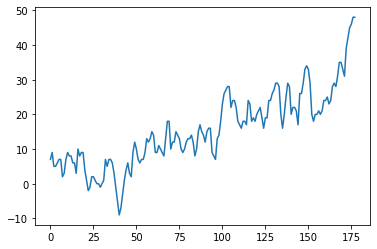

In [102]:
#plt.plot(summary[0]+summary[1]+summary[2]+summary[3])
plt.plot(summary[0])

plt.show

In [93]:
for k, elt in enumerate(my_list[0]):
    print(k,elt)

0 STATION
1 DATE
2 LATITUDE
3 LONGITUDE
4 ELEVATION
5 NAME
6 TEMP
7 TEMP_ATTRIBUTES
8 DEWP
9 DEWP_ATTRIBUTES
10 SLP
11 SLP_ATTRIBUTES
12 STP
13 STP_ATTRIBUTES
14 VISIB
15 VISIB_ATTRIBUTES
16 WDSP
17 WDSP_ATTRIBUTES
18 MXSPD
19 GUST
20 MAX
21 MAX_ATTRIBUTES
22 MIN
23 MIN_ATTRIBUTES
24 PRCP
25 PRCP_ATTRIBUTES
26 SNDP
27 FRSHTT
